## Importing the dataset into the notebook

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


## Checking that the amount of recordings is accurate with 195

In [2]:
data.shape

(195, 24)

## Checking if there are any missing data points

In [3]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

## Starting the holdout method

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

x = data.iloc[:, 1:23].values
y = data.iloc[:, 23].values
label = LabelEncoder()
y = label.fit_transform(y)
label.classes_

array([0, 1], dtype=int64)

## Splitting the training and test data

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y,random_state=1)

In [6]:
print("X_train shape: ", x_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", x_test.shape)
print("Y_test shape: ", y_test.shape)

('X_train shape: ', (156L, 22L))
('Y_train shape: ', (156L,))
('X_test shape: ', (39L, 22L))
('Y_test shape: ', (39L,))


## Beginning the grid search cross validation, defining the range of k values

In [7]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(4, 11))
print(k_range)

[4, 5, 6, 7, 8, 9, 10]


## Importing the k-nn algorithm

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k_range)

## Mapping the parameter names to values that should be searched, creating a parameter grid

In [9]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [4, 5, 6, 7, 8, 9, 10]}


## Instantiating the grid and performing grid search. Performing a 10-fold cross validation 

In [10]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1,
           n_neighbors=[4, 5, 6, 7, 8, 9, 10], p=2, weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

## Finding the optimal k by the best_params_, which ends up being 6. Also showing in the best estimator that k=n_neighbors=6

In [11]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8012820512820513
{'n_neighbors': 6}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


## Showing the scores for each parameter in the grid. k=6 has the highest mean accuracy along with 7 and 8, however the standard deviation for k=6 is the lowest out of those values.

In [12]:
grid.grid_scores_

C:\Users\Alex\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.77564, std: 0.09329, params: {'n_neighbors': 4},
 mean: 0.77564, std: 0.06336, params: {'n_neighbors': 5},
 mean: 0.80128, std: 0.06369, params: {'n_neighbors': 6},
 mean: 0.80128, std: 0.07649, params: {'n_neighbors': 7},
 mean: 0.80128, std: 0.07990, params: {'n_neighbors': 8},
 mean: 0.79487, std: 0.08571, params: {'n_neighbors': 9},
 mean: 0.79487, std: 0.08749, params: {'n_neighbors': 10}]

## Plotting the learning curve using a cross validation with 100 iterations to obtain smooth train and test score curves

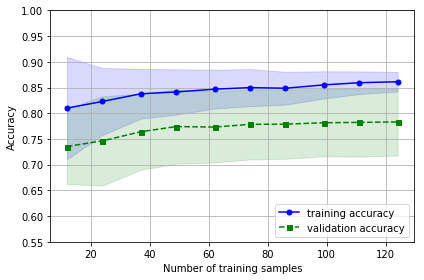

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, ShuffleSplit
#from sklearn.naive_bayes import GaussianNB
cv=ShuffleSplit(n_splits=100,test_size=.2,random_state=1)
#estimator = GaussianNB()
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=grid.best_estimator_,
                               X=x_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=cv,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.55, 1.0])
plt.tight_layout()
plt.show()

## Plotting the validation curve using the parameters. It can be seen that k=6 is the optimal parameter as it has the highest mean accuracy with the lowest standard deviation among the other high mean accuracies.

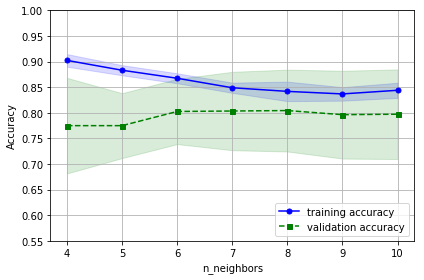

In [14]:
from sklearn.model_selection import validation_curve

param_range = [4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(
                estimator=grid.estimator, 
                X=x_train, 
                y=y_train, 
                param_name='n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.55, 1.0])
plt.tight_layout()
plt.show()